## Homework 2
Author: Zihao Zhan

## Prepare Python Env

In [28]:
%pip install kagglehub pandas numpy seaborn matplotlib scikit-learn torch scipy

## Load dataset
Used same dataset from homework1
And we drop the field as the homeowork 1 did.

In [29]:
import kagglehub
import pandas as pd
import numpy as np
import os
from IPython.display import display

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
csv_file = [f for f in os.listdir(path) if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv_file))
df_clean = df.drop(columns=["id", 'Unnamed: 32'], errors='ignore')
df_clean['diagnosis'] = df_clean['diagnosis'].map({'M': 1, 'B': 0})

df_clean = df_clean.drop(columns=[col for col in df_clean.columns if 'perimeter' in col or 'area' in col])

display(df_clean.head(5))

Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.


,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Task 1

### 1.1 & 1.2 Decision Tree Train

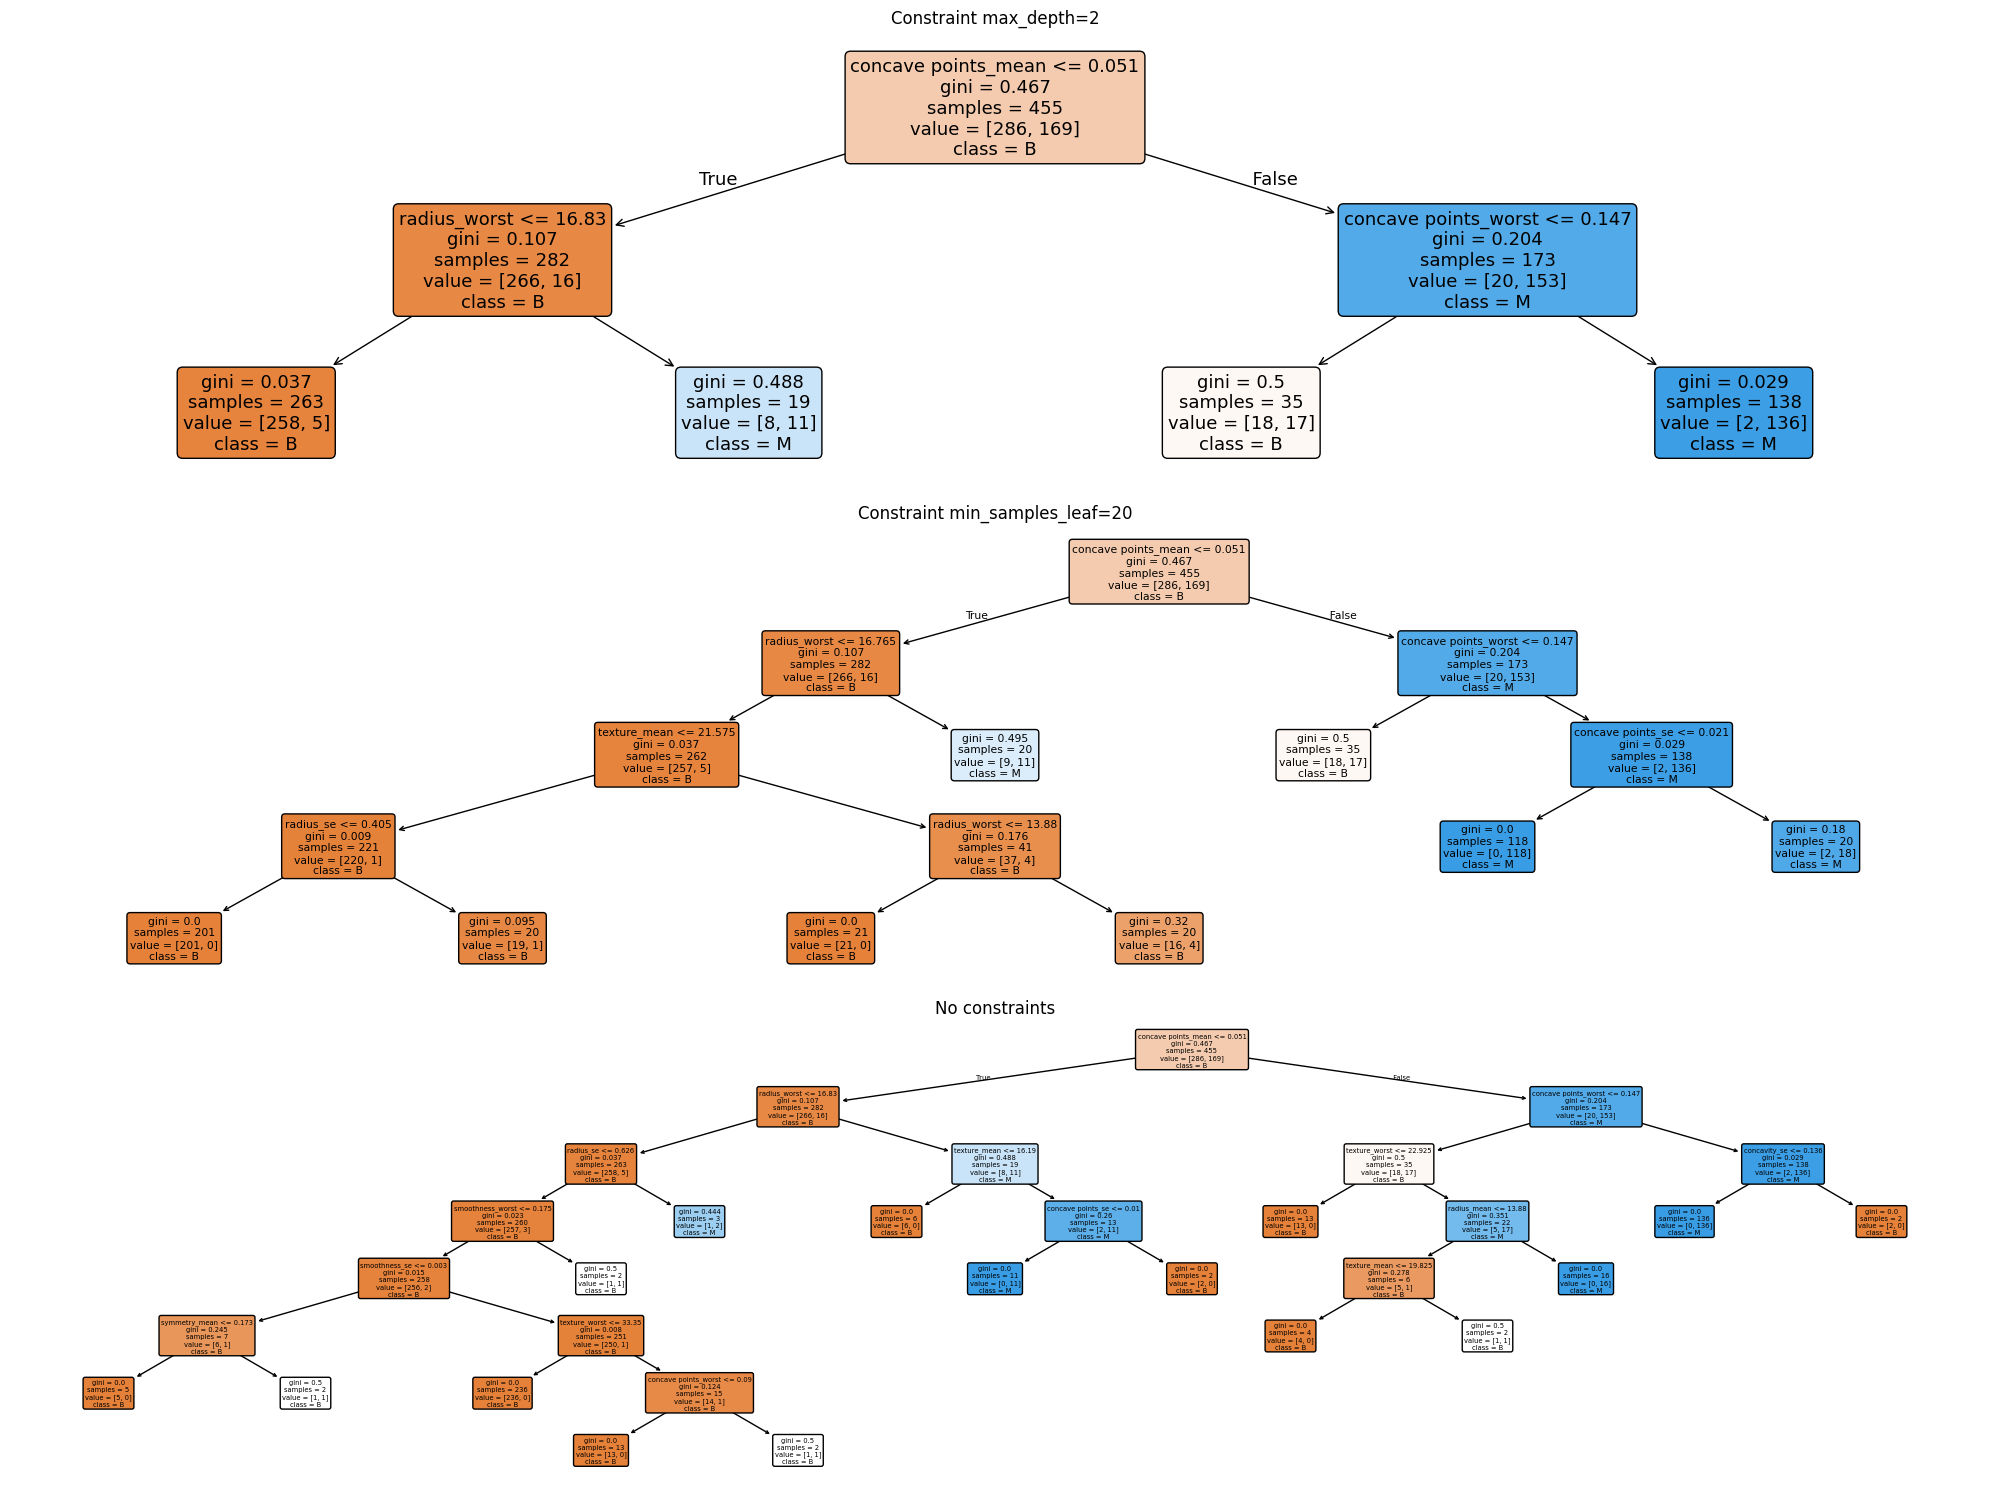

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X = df_clean.drop('diagnosis', axis=1)
y = df_clean['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

configs = [
    {"max_depth": 2, "min_samples_leaf": 1, "title": "Constraint max_depth=2"},
    {"max_depth": None, "min_samples_leaf": 20, "title": "Constraint min_samples_leaf=20"},
    {"max_depth": None, "min_samples_leaf": 2, "title": "No constraints"}
]

plt.figure(figsize=(20, 15))

for index, config in enumerate(configs):
    dtc_model = DecisionTreeClassifier(max_depth=config['max_depth'], 
                                 min_samples_leaf=config['min_samples_leaf'],
                                 random_state=42)
    dtc_model.fit(X_train, y_train)
    
    plt.subplot(3, 1, index+1)
    plot_tree(dtc_model, feature_names=X.columns, class_names=['B', 'M'], filled=True, rounded=True)
    plt.title(config['title'])

plt.tight_layout()
plt.show()

### 1.3 Research on Sensitivity Analysis

From Saltelli *et al.*, sensitivity analysis is “the study of how uncertainty in the output of a model (numerical or otherwise) can be apportioned to different sources of uncertainty in the model input”. It basically analyze the relationship between model inputs and outputs.

The sensitivity analysis has two main catrgory: local and global. Simply put, local senstivity analysis suitable for linear model with small variable inputs, and it consume less computational power. In contrast, if the model if non-linear, the local sensitivity analysis can be heavily biased, as they strongly influenced by independence assumptions and a limited exploration of model inputs. (Reed *et al.*)

For our experiment, I decide to use a global method called Partial dependence plots, this is a build in library from sckikit learn. According to Hastie et al, Partial Dependence Plots provide a way to visualie the black box relationship between input variables and the model's prediction. The partial dependece of a feature $f(X)$ on $X_s$ is defined by marginalizing the function over the values of all other inputs $(X_c)$. This is estimated by averaging the model's prediction over the training data $(X_C)$.
$$
\bar{f}_S(X_S) = \frac{1}{N} \sum_{i=1}^{N} f(X_S, x_{iC})
$$

[1] Andrea Saltelli, Stefano Tarantola, Francesca Campolongo, and Marco Ratto. Sensitivity analysis in practice: a guide to assessing scientific models. Volume 1. Wiley Online Library, 2004.

[2] Reed, P.M., Hadjimichael, A., Malek, K., Karimi, T., Vernon, C.R., Srikrishnan, V., Gupta, R.S., Gold, D.F., Lee, B., Keller, K., Thurber, T.B, & Rice, J.S. (2022). Addressing Uncertainty in Multisector Dynamics Research [Book]. Zenodo. https://doi.org/10.5281/zenodo.6110623

[3] “5.1. Partial Dependence and Individual Conditional Expectation plots,” scikit-learn. Accessed: Feb. 03, 2026. [Online]. Available: https://scikit-learn/stable/modules/partial_dependence.html

[4] T. Hastie, R. Tibshirani and J. Friedman, The Elements of Statistical Learning, Second Edition, Section 10.13.2, Springer, 2009

Performing Analysis on: ['concave points_mean', 'concave points_worst']


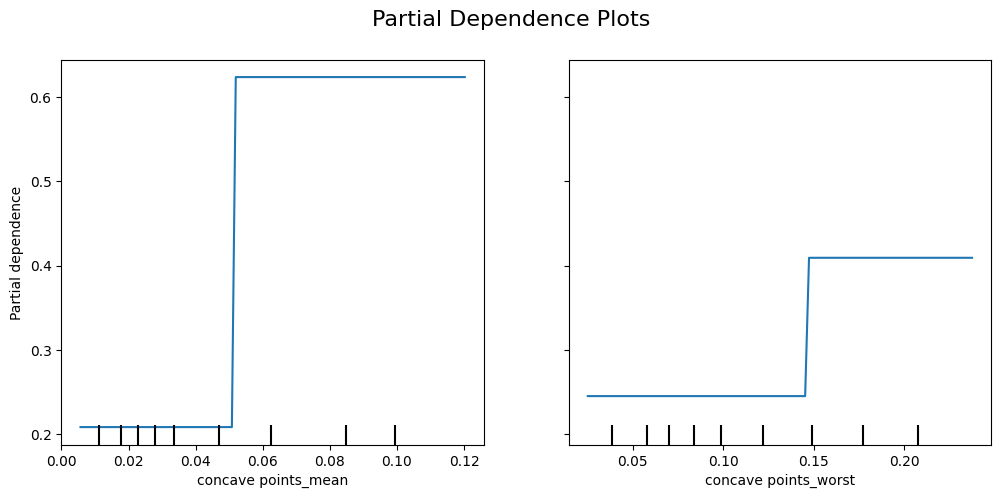

In [31]:
from sklearn.inspection import PartialDependenceDisplay

new_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42).fit(X_train, y_train)

# Automatically select top 2 important features
importances = new_model.feature_importances_
top_indices = np.argsort(importances)[-2:]
target_features = [X.columns[top_indices[1]], X.columns[top_indices[0]]]

print(f"Performing Analysis on: {target_features}")
fig, ax = plt.subplots(figsize=(12, 5))
PartialDependenceDisplay.from_estimator(new_model, X_train, target_features, ax=ax)
plt.suptitle("Partial Dependence Plots", fontsize=16)
plt.show()

The above graph shows the feature `points_mean`'s partial dependence growth straightly as the value of 0.4~0.5, the `points_worst` has less but also has a major impact staring at 0.15. The "step-like" transitions are characteristic of Decision Trees The plots confirm that the model's diagnostic logic is heavily driven by these specific feature thresholds, independent of the average effects of other variables.

## Task 2

We use random forest from Bagging and XGBoost from Boosting.

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate


models = {
    "Bagging - Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Boosting - XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)
}

results = {}

for name, model in models.items():
    model_results = {}
    for k in [5, 10, 15]:
        skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        cv_results = cross_validate(model, X, y, cv=skf, scoring={
            'accuracy': 'accuracy',
            'precision': 'precision',
            'f1': 'f1'
        })
        
        model_results[k] = {
            'Accuracy': cv_results['test_accuracy'].mean(),
            'Precision': cv_results['test_precision'].mean(),
            'F1': cv_results['test_f1'].mean()
        }
    results[name] = model_results

for name in results:
    print(f"{name} Performance")
    print(pd.DataFrame(results[name]).T)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:16:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:16:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:16:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:16:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:16:46] WARNING: /w

Bagging - Random Forest Performance
    Accuracy  Precision        F1
5   0.957848   0.953120  0.942271
10  0.956140   0.952596  0.939851
15  0.959649   0.962888  0.943876
Boosting - XGBoost Performance
    Accuracy  Precision        F1
5   0.964850   0.967443  0.951997
10  0.963127   0.969455  0.948969
15  0.968374   0.978345  0.955623
Decision Tree Performance
    Accuracy  Precision        F1
5   0.929731   0.927860  0.903337
10  0.920990   0.921252  0.888614
15  0.928070   0.929033  0.897793


## Task 3

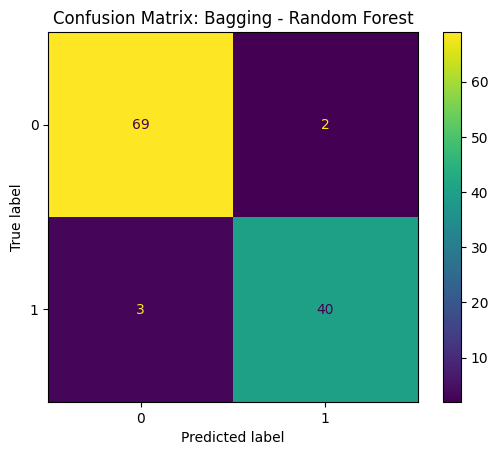

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:16:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


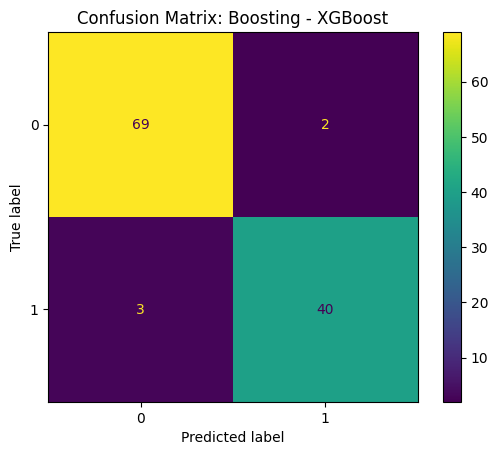

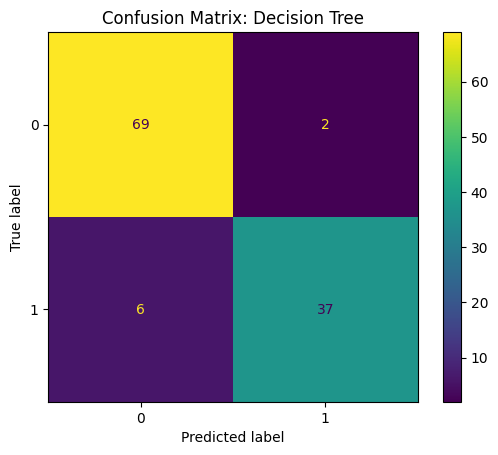

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:16:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:16:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:16:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:16:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:16:51] WARNING: /w

Paired t-test p-value: 0.0376


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:16:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:16:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy import stats

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
    disp.plot()
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

dtc_scores = cross_validate(models["Decision Tree"], X, y, cv=10)['test_score']
rf_scores = cross_validate(models["Bagging - Random Forest"], X, y, cv=10)['test_score']
xgb_scores = cross_validate(models["Boosting - XGBoost"], X, y, cv=10)['test_score']

t_stat, p_value = stats.ttest_rel(rf_scores, xgb_scores)
print(f"Paired t-test p-value: {p_value:.4f}")

### Discussion

From the output, the p-value is `0.0376 < 0.05`, so we're able to tell how those three models are significantly different in this dataset. XGBoost generally has the heightest accuracy and better F1 score among all, the traditional Decision Tree has the worst accuracy and F1 score at 15-fold. 

In confusion matrix evaluation, both XGBoost and Random Forest produced identical results with only 5 misclassifications out of 144 samples.
- Flase Positive: 2
- False Negative: 3

Whlile the Decision Tree does report more false than ensemble learning methods.
- False Positive: 2
- False Negative: 6

The XGBoost and Random Forset has a samll difference in performance, the Decision Tree model is the main contributor for this low p-value. The huge difference (>3%) confirms there is a statistical difference between tranditional decision tree method and ensemble learning method. The difference between two ensemble models may not be statistically significant at this sample size.

Bias-Variance Trade off:
- Decision Tree shows a high variance, which is highly sensitive to the noise in the training data, leads poort generalization
- Random Forset just improved what Decision Tree doing bad, focusing on reducing variance, which using multiple trees.
- XGBoost, focusing on reducing bias, it continuosly fitting new models to the residuals of previous ones, which significantly reduce the error, in this small sample size, it is more effecient for improving accuracy.